# Utils & Libraries

In [ ]:
import time

In [ ]:
import os
import PIL
import copy
import torch
import torchvision
import numpy as np
import albumentations
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

In [ ]:
import random
import math
import time
import pandas as pd
import numpy as np

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import os
import urllib.request
import zipfile
import tarfile

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 6.2 MB/s 


In [ ]:
import timm

ModuleNotFoundError: ignored

In [ ]:
from torch.utils.data import Dataset
# from modules.utils import load_json
import numpy as np
from PIL import Image
import os
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import os
import sys
from torch import nn

from datetime import datetime, timezone, timedelta
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import logging
import torch
import csv
import torchvision.transforms as transforms
import numpy as np
import torch
import torch.optim as optim
from time import time
from tqdm import tqdm
from torch.nn import functional as F
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch.optim as optim
from itertools import product
import logging
import random
import pickle
import shutil
import json
import yaml
import csv
import os
from scipy.stats import entropy

In [ ]:
import os.path as osp
from PIL import Image
import torch.utils.data as data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

def dice_coef(y_true, y_pred, epsilon=1e-6):
    y_true_flatten = np.asarray(y_true).astype(np.bool)
    y_pred_flatten = np.asarray(y_pred).astype(np.bool)

    if not np.sum(y_true_flatten) + np.sum(y_pred_flatten):
        return 1.0

    return (2. * np.sum(y_true_flatten * y_pred_flatten)) /\
           (np.sum(y_true_flatten) + np.sum(y_pred_flatten) + epsilon)

In [ ]:
def cut(W,H,lam):

    ######define the size of box######
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int64(W * cut_rat)
    cut_h = np.int64(H * cut_rat)
    ######define the size of box######

    #####randomly choose where to cut#####
    cx = np.random.randint(W) # uniform distribution
    cy = np.random.randint(H)
    #####randomly choose where to cut#####

    bbx1 = np.clip(cx - cut_w // 2, 0, W) # Cut, return coordinates of the box
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

# Data

## Get Data, Split, Make List

In [ ]:
#get data from gdrive
import shutil
!mkdir data
file1 = "/content/drive/MyDrive/2022/LungSegmentation/Lung_Segmentation.zip"
#file1 = "/content/drive/MyDrive/train.zip"
shutil.unpack_archive(file1, "/content/data")

In [ ]:
anno_dir = '/content/drive/MyDrive/2022/LungSegmentation/annotation/'
data_dir = '/content/data/image/'

In [ ]:
first_anno = os.listdir(anno_dir)[0]
first_anno

'resize_CHNCXR_0539_1.png'

In [ ]:
os.listdir(data_dir)[0]

'resize_CHNCXR_0586_1.png'

In [ ]:
assert len(os.listdir(anno_dir)) == len(os.listdir(data_dir))
print("entire data:",len(os.listdir(data_dir)))

entire data: 566


In [ ]:
train_size = int(np.ceil(len(os.listdir(data_dir))*.7))
val_size = len(os.listdir(data_dir))-train_size
print(f"train size: {train_size}, test_size: {val_size}")

train size: 397, test_size: 169


In [ ]:
train_names = os.listdir(data_dir)[:train_size]
val_names = os.listdir(data_dir)[train_size:]

In [ ]:
train_img_list = []
test_img_list = []
train_anno_list = []
test_anno_list = []

for train_name in train_names:
  train_img_list.append(data_dir+train_name)
  train_anno_list.append(anno_dir + train_name)


for test_name in val_names:
  test_img_list.append(data_dir+test_name)
  test_anno_list.append(anno_dir+test_name)

In [ ]:
train_img_list[:5]

['/content/data/image/resize_CHNCXR_0586_1.png',
 '/content/data/image/resize_CHNCXR_0102_0.png',
 '/content/data/image/resize_CHNCXR_0265_0.png',
 '/content/data/image/resize_CHNCXR_0063_0.png',
 '/content/data/image/resize_CHNCXR_0504_1.png']

In [ ]:
train_anno_list[:5]

['/content/drive/MyDrive/2022/LungSegmentation/annotation/resize_CHNCXR_0586_1.png',
 '/content/drive/MyDrive/2022/LungSegmentation/annotation/resize_CHNCXR_0102_0.png',
 '/content/drive/MyDrive/2022/LungSegmentation/annotation/resize_CHNCXR_0265_0.png',
 '/content/drive/MyDrive/2022/LungSegmentation/annotation/resize_CHNCXR_0063_0.png',
 '/content/drive/MyDrive/2022/LungSegmentation/annotation/resize_CHNCXR_0504_1.png']

In [ ]:
print(f"train img size: {len(train_img_list)} train anno size: {len(train_anno_list)}, test img size: {len(test_img_list)} test anno size: {len(test_anno_list)}")

train img size: 397 train anno size: 397, test img size: 169 test anno size: 169


get pretrained weights

In [ ]:
weights_dir = "./weights/"
if not os.path.exists(weights_dir):
    os.mkdir(weights_dir)

In [ ]:
!cp /content/drive/MyDrive/2022/LungSegmentation/pspnet50_ADE20K.pth /content/weights

## Define Dataset

In [ ]:
!cp /content/drive/MyDrive/2022/LungSegmentation/data_augumentation.py /content

In [ ]:
from data_augumentation import *

In [ ]:
class DataTransform():
  def __init__(self, input_size, color_mean, color_std):#input_size: size you want the image to be
    self.data_transform = {
            'train': Compose([
                Resize(input_size),
                Normalize_Tensor(color_mean, color_std)#Normalization+ToTensor
            ]),
            'train_aug': Compose([
                RandomMirror(),
                Resize(input_size),  # リサイズ(input_size)
                Normalize_Tensor(color_mean, color_std)  # 色情報の標準化とテンソル化
            ]),
            'val': Compose([
                Resize(input_size),
                Normalize_Tensor(color_mean, color_std)#Normalization+ToTensor
            ])
        }
  def __call__(self, phase, img, anno_class_img):
        return self.data_transform[phase](img, anno_class_img)

In [ ]:
class LungDataset(data.Dataset):
  def __init__(self, img_list, anno_list, phase, transform):
        self.img_list = img_list
        self.anno_list = anno_list
        self.phase = phase#train or test
        self.transform = transform

  def __len__(self):
        return len(self.img_list)

  def __getitem__(self, index):
        img, anno_class_img = self.pull_item(index)
        return img, anno_class_img

  def pull_item(self, index):
        image_file_path = self.img_list[index]
        img = Image.open(image_file_path)#height, width, channel

        anno_file_path = self.anno_list[index]
        anno_class_img = Image.open(anno_file_path)

        img, anno_class_img = self.transform(self.phase, img, anno_class_img)

        return img, anno_class_img

In [ ]:
color_mean = (0.485, 0.456, 0.406)
color_std = (0.229, 0.224, 0.225)

In [ ]:
train_dataset = LungDataset(train_img_list, train_anno_list, phase="train", transform=DataTransform(
    input_size=475, color_mean=color_mean, color_std=color_std))

In [ ]:
train_aug_dataset = LungDataset(train_img_list, train_anno_list, phase="train_aug", transform=DataTransform(
    input_size=475, color_mean=color_mean, color_std=color_std))

In [ ]:
val_dataset = LungDataset(test_img_list, test_anno_list, phase="val", transform=DataTransform(
    input_size=475, color_mean=color_mean, color_std=color_std))

In [ ]:
len(train_dataset)

397

In [ ]:
len(train_aug_dataset)

397

In [ ]:
len(val_dataset)

169

In [ ]:
print(train_dataset.__getitem__(0)[0].shape)#img
print(train_dataset.__getitem__(0)[1].shape)#annotation

torch.Size([3, 475, 475])
torch.Size([475, 475])


In [ ]:
print(train_aug_dataset.__getitem__(0)[0].shape)#img
print(train_aug_dataset.__getitem__(0)[1].shape)#annotation

torch.Size([3, 475, 475])
torch.Size([475, 475])


In [ ]:
print(val_dataset.__getitem__(0)[0].shape)#img
print(val_dataset.__getitem__(0)[1].shape)#annotation

torch.Size([3, 475, 475])
torch.Size([475, 475])


In [ ]:
np.unique(val_dataset.__getitem__(0)[1])#0: background, 30: left, 60: right

array([0, 1, 2], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


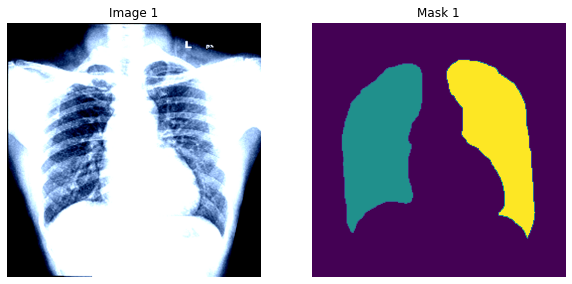

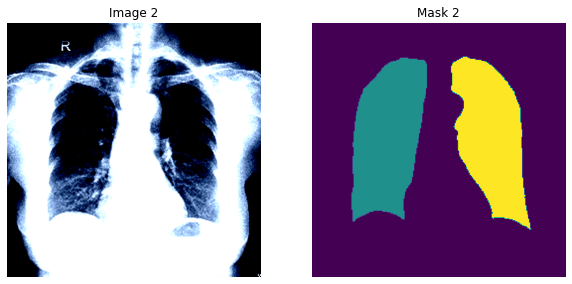

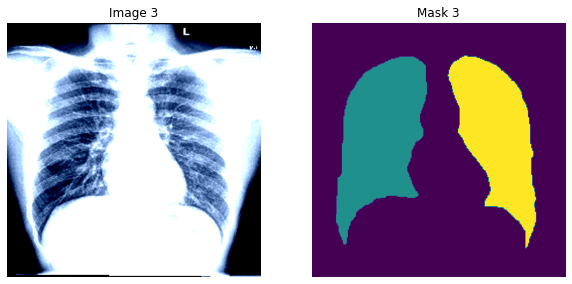

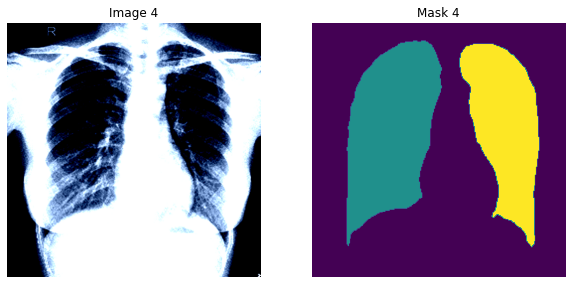

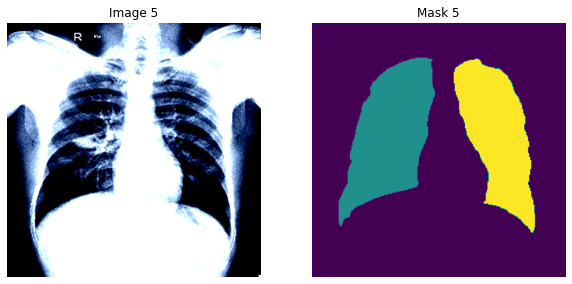

In [ ]:
for i in range(5):
  anno = val_dataset.__getitem__(i)[1]
  img = val_dataset.__getitem__(i)[0]
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
  ax1.imshow(img.permute(1,2,0))
  ax1.set_title(f'Image {i+1}')
  ax1.axis('off')
  ax2.imshow(anno)
  ax2.set_title(f'Mask {i+1}')
  ax2.axis('off')

## Define DataLoader

In [ ]:
batch_size = 8
#train_dataset = torch.utils.data.ConcatDataset([train_dataset, train_aug_dataset])#,batch_size = batch_size, shuffle = True)
train_dataloader = data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_dataloader = data.DataLoader(val_dataset, batch_size = batch_size, shuffle = False)
dataloaders_dict = {"train":train_dataloader, "val":val_dataloader}

In [ ]:
num_train_imgs = len(dataloaders_dict["train"].dataset)
print(f"final train dataset size: {num_train_imgs}")

final train dataset size: 397


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


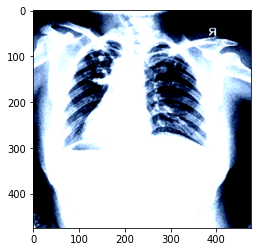

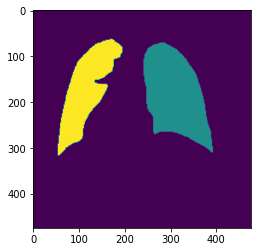

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


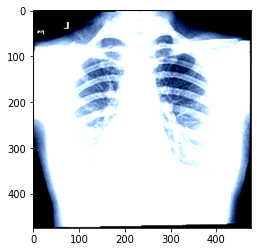

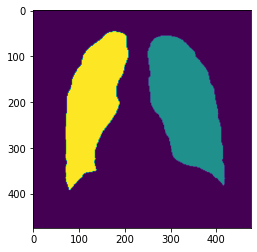

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


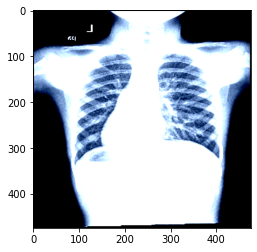

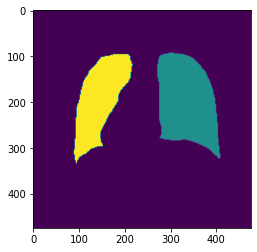

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


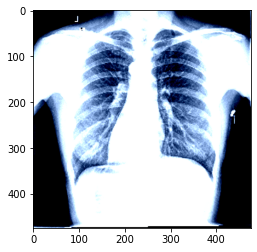

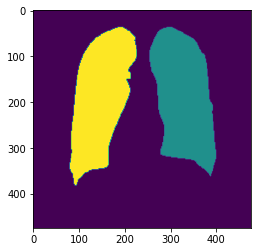

In [ ]:
for i in range(4):
  sample_img, sample_mask = train_aug_dataset.__getitem__(i)[0],train_aug_dataset.__getitem__(i)[1]
  plt.imshow(sample_img.permute(1,2,0))
  plt.show()
  plt.imshow(sample_mask)
  plt.show()

In [ ]:
batch_iterator = iter(dataloaders_dict['train'])
images, anno_class_images = next(batch_iterator)
print(images.size())
print(anno_class_images.size())

torch.Size([8, 3, 475, 475])
torch.Size([8, 475, 475])


In [ ]:
batch_iterator = iter(dataloaders_dict['val'])
images, anno_class_images = next(batch_iterator)
print(images.size())
print(anno_class_images.size())

torch.Size([8, 3, 475, 475])
torch.Size([8, 475, 475])


# PSPNet (Pyramid Scene Parsing Network)

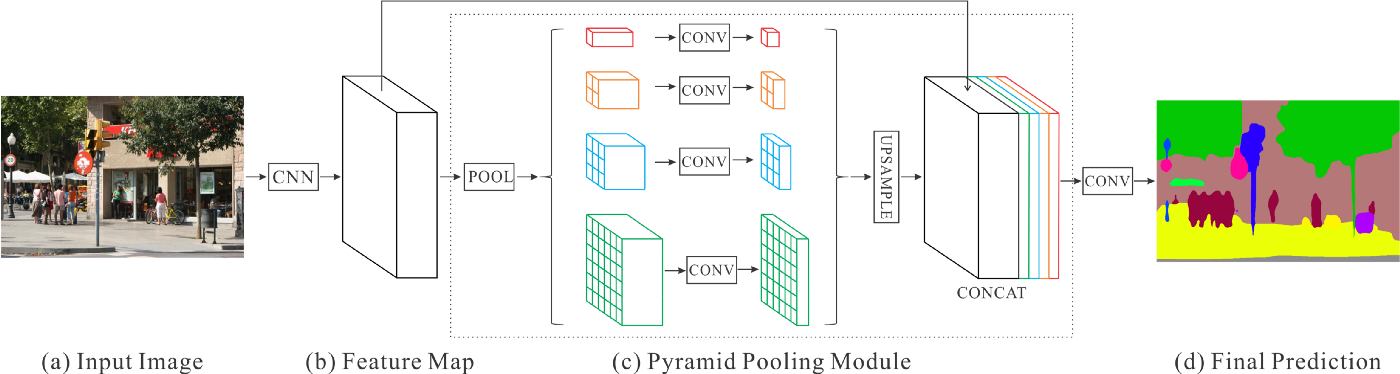

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Entire Class

- Feature Module
- Pyramid Pooling
- Decoder Module
- AuxLoss Module

In [ ]:
class PSPNet(nn.Module):
    def __init__(self, n_classes = 3):
        super(PSPNet, self).__init__()

        # set parameters
        block_config = [3, 4, 6, 3]  # resnet50
        img_size = 475
        img_size_8 = 60  # img_size 1/8로 설정

        # preparations for sub networks
        self.feature_conv = FeatureMap_convolution()
        self.feature_res_1 = ResidualBlockPSP(
            n_blocks=block_config[0], in_channels=128, mid_channels=64, out_channels=256, stride=1, dilation=1)
        self.feature_res_2 = ResidualBlockPSP(
            n_blocks=block_config[1], in_channels=256, mid_channels=128, out_channels=512, stride=2, dilation=1)
        self.feature_dilated_res_1 = ResidualBlockPSP(
            n_blocks=block_config[2], in_channels=512, mid_channels=256, out_channels=1024, stride=1, dilation=2)
        self.feature_dilated_res_2 = ResidualBlockPSP(
            n_blocks=block_config[3], in_channels=1024, mid_channels=512, out_channels=2048, stride=1, dilation=4)

        self.pyramid_pooling = PyramidPooling(in_channels=2048, pool_sizes=[
            6, 3, 2, 1], height=img_size_8, width=img_size_8)

        self.decode_feature = DecodePSPFeature(
            height=img_size, width=img_size, n_classes=n_classes)

        self.aux = AuxiliaryPSPlayers(
            in_channels=1024, height=img_size, width=img_size, n_classes=n_classes)

    def forward(self, x):
        x = self.feature_conv(x)
        x = self.feature_res_1(x)
        x = self.feature_res_2(x)
        x = self.feature_dilated_res_1(x)

        output_aux = self.aux(x)  # Feture embedding -> aux

        x = self.feature_dilated_res_2(x)

        x = self.pyramid_pooling(x)
        output = self.decode_feature(x)

        return (output, output_aux)

## Feature Module (ResNet)

- FeatureMap_convolution
- 2 x residualBlockPSP
- 2 xdilated residualBlockPSP

### FeatureMap_convolution

: extract features of image

3x conv2DBatchNormReLU + 1x Maxpool

In [ ]:
class conv2DBatchNormRelu(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, dilation, bias):
        super(conv2DBatchNormRelu, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels,
                              kernel_size, stride, padding, dilation, bias=bias)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # inplase = True -> don't save input -> memory efficient

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        outputs = self.relu(x)

        return outputs

In [ ]:
class FeatureMap_convolution(nn.Module):
    def __init__(self):
        super(FeatureMap_convolution, self).__init__()

        # conv1
        in_channels, out_channels, kernel_size, stride, padding, dilation, bias = 3, 64, 3, 2, 1, 1, False
        self.cbnr_1 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size, stride, padding, dilation, bias)

        # conv2
        in_channels, out_channels, kernel_size, stride, padding, dilation, bias = 64, 64, 3, 1, 1, 1, False
        self.cbnr_2 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size, stride, padding, dilation, bias)

        # conv3
        in_channels, out_channels, kernel_size, stride, padding, dilation, bias = 64, 128, 3, 1, 1, 1, False
        self.cbnr_3 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size, stride, padding, dilation, bias)

        # MaxPooling layer
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.cbnr_1(x)
        x = self.cbnr_2(x)
        x = self.cbnr_3(x)
        outputs = self.maxpool(x)
        return outputs

### Residual Block PSP

skip connection을 통해 residual (y-x)를 학습하게 하는 전략

- bottleNeckPSP: Relu{(2x conv2DBatchNormRelu + conv2DBatchNorm) + skip(conv2dBatchNOrm)}
- bottleNeckIdentifyPSP: Relu{(2x conv3dBatchNormRelu + conv2dBatchNorm)+skip(input)}

차이: skip connection에 convolution 적용 여부

Process: bottleNeckPSP + iterations(bottleNeckIdentityPSP)

In [ ]:
class ResidualBlockPSP(nn.Sequential):#if dilation > 2; dilated residual block PSP
    def __init__(self, n_blocks, in_channels, mid_channels, out_channels, stride, dilation):
        super(ResidualBlockPSP, self).__init__()

        # prepare bottleNeckPSP
        self.add_module(
            "block1",
            bottleNeckPSP(in_channels, mid_channels,
                          out_channels, stride, dilation)
        )

        # prepare for iterations of bottleNeckIdentifyPSP
        for i in range(n_blocks - 1):#iterations: 3, 4, 6, 3 for ResNet-50
            self.add_module(
                "block" + str(i+2),
                bottleNeckIdentifyPSP(
                    out_channels, mid_channels, stride, dilation)
            )

In [ ]:
class conv2DBatchNorm(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, dilation, bias):
        super(conv2DBatchNorm, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels,
                              kernel_size, stride, padding, dilation, bias=bias)
        self.batchnorm = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.conv(x)
        outputs = self.batchnorm(x)

        return outputs

#### BottleNeckPSP

In [ ]:
class bottleNeckPSP(nn.Module):
    def __init__(self, in_channels, mid_channels, out_channels, stride, dilation):
        super(bottleNeckPSP, self).__init__()

        self.cbr_1 = conv2DBatchNormRelu(
            in_channels, mid_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)
        self.cbr_2 = conv2DBatchNormRelu(
            mid_channels, mid_channels, kernel_size=3, stride=stride, padding=dilation, dilation=dilation, bias=False)
        self.cb_3 = conv2DBatchNorm(
            mid_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)

        #skip connection
        self.cb_residual = conv2DBatchNorm(
            in_channels, out_channels, kernel_size=1, stride=stride, padding=0, dilation=1, bias=False)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        conv = self.cb_3(self.cbr_2(self.cbr_1(x)))
        residual = self.cb_residual(x)#skip connection for convolution (conv2dBatchNorm)
        return self.relu(conv + residual)

#### bottleNeckIdentifyPSP

In [ ]:
class bottleNeckIdentifyPSP(nn.Module):
    def __init__(self, in_channels, mid_channels, stride, dilation):
        super(bottleNeckIdentifyPSP, self).__init__()

        self.cbr_1 = conv2DBatchNormRelu(
            in_channels, mid_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)
        self.cbr_2 = conv2DBatchNormRelu(
            mid_channels, mid_channels, kernel_size=3, stride=1, padding=dilation, dilation=dilation, bias=False)
        self.cb_3 = conv2DBatchNorm(
            mid_channels, in_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        conv = self.cb_3(self.cbr_2(self.cbr_1(x)))
        residual = x#skip connection for input (x)
        return self.relu(conv + residual)

## Pyramid Pooling Module

1. Adatptive Average Pooling layer
2. conv2DBatchNormRelu
3. UpSample layer (F.interpolate)
4. Recombine (기준: channel)


**Usage**: For getting info. of adjacent pixels of object -> high precision

In [ ]:
class PyramidPooling(nn.Module):
    def __init__(self, in_channels, pool_sizes, height, width):
        super(PyramidPooling, self).__init__()

        # height & width for forward propagation
        self.height = height
        self.width = width

        # number of output channel for each conv layer
        out_channels = int(in_channels / len(pool_sizes))

        # each conv layer
        # pool_sizes: [6, 3, 2, 1]
        self.avpool_1 = nn.AdaptiveAvgPool2d(output_size=pool_sizes[0])#adaptie average pooling layer
        self.cbr_1 = conv2DBatchNormRelu(#conv2DBatchNormRelu
            in_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)

        self.avpool_2 = nn.AdaptiveAvgPool2d(output_size=pool_sizes[1])
        self.cbr_2 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)

        self.avpool_3 = nn.AdaptiveAvgPool2d(output_size=pool_sizes[2])
        self.cbr_3 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)

        self.avpool_4 = nn.AdaptiveAvgPool2d(output_size=pool_sizes[3])
        self.cbr_4 = conv2DBatchNormRelu(
            in_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)

    def forward(self, x):

        out1 = self.cbr_1(self.avpool_1(x))
        out1 = F.interpolate(out1, size=(
            self.height, self.width), mode="bilinear", align_corners=True)#UpSample layer

        out2 = self.cbr_2(self.avpool_2(x))
        out2 = F.interpolate(out2, size=(
            self.height, self.width), mode="bilinear", align_corners=True)#UpSample layer

        out3 = self.cbr_3(self.avpool_3(x))
        out3 = F.interpolate(out3, size=(
            self.height, self.width), mode="bilinear", align_corners=True)#UpSample layer

        out4 = self.cbr_4(self.avpool_4(x))
        out4 = F.interpolate(out4, size=(
            self.height, self.width), mode="bilinear", align_corners=True)#UpSample layer

        #dim = 1기준(channel 기준) concatenate(recombine)
        output = torch.cat([x, out1, out2, out3, out4], dim=1)#output size: batch_size x 4096 x 60 x 60

        return output

## Decoder & AuxLoss Module

**Function**:
- read info from tensor and predict label in pixel-level.
- upsample to original size of image


**Process**:
1. conv2DBatchNormRelu
2. Dropout
3. Convolution layer
4. Upsample

In [ ]:
class DecodePSPFeature(nn.Module):
    def __init__(self, height, width, n_classes):
        super(DecodePSPFeature, self).__init__()

        # height & width for forward propagation
        self.height = height
        self.width = width


        self.cbr = conv2DBatchNormRelu(
            in_channels=4096, out_channels=512, kernel_size=3, stride=1, padding=1, dilation=1, bias=False)
        self.dropout = nn.Dropout2d(p=0.1)
        self.classification = nn.Conv2d(
            in_channels=512, out_channels=n_classes, kernel_size=1, stride=1, padding=0)

    def forward(self, x):
        x = self.cbr(x)#1. conv2DBatchNormRelu
        x = self.dropout(x)#2. Dropout
        x = self.classification(x)#3. Convolution layer

        output = F.interpolate(#4. Upsample
            x, size=(self.height, self.width), mode="bilinear", align_corners=True)

        return output

In [ ]:
class AuxiliaryPSPlayers(nn.Module):#same as decoder
    def __init__(self, in_channels, height, width, n_classes):
        super(AuxiliaryPSPlayers, self).__init__()
        self.height = height
        self.width = width

        self.cbr = conv2DBatchNormRelu(
            in_channels=in_channels, out_channels=256, kernel_size=3, stride=1, padding=1, dilation=1, bias=False)
        self.dropout = nn.Dropout2d(p=0.1)
        self.classification = nn.Conv2d(
            in_channels=256, out_channels=n_classes, kernel_size=1, stride=1, padding=0)

    def forward(self, x):
        x = self.cbr(x)
        x = self.dropout(x)
        x = self.classification(x)
        output = F.interpolate(
            x, size=(self.height, self.width), mode="bilinear", align_corners=True)

        return output

In [ ]:
net = PSPNet(n_classes = 2)
net

PSPNet(
  (feature_conv): FeatureMap_convolution(
    (cbnr_1): conv2DBatchNormRelu(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_2): conv2DBatchNormRelu(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_3): conv2DBatchNormRelu(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_res_1): ResidualBlockPSP(
    (block1): bottleNec

In [ ]:
batch_size = 2
dummy_img = torch.rand(batch_size, 3, 475, 475)

outputs = net(dummy_img)
print(outputs)#계산되는지 확인

(tensor([[[[ 0.3354,  0.3126,  0.2899,  ..., -0.1388, -0.2057, -0.2726],
          [ 0.3553,  0.3328,  0.3103,  ..., -0.1141, -0.1685, -0.2230],
          [ 0.3752,  0.3530,  0.3308,  ..., -0.0894, -0.1314, -0.1734],
          ...,
          [ 0.4340,  0.3987,  0.3633,  ..., -0.1642, -0.1736, -0.1831],
          [ 0.4293,  0.3986,  0.3680,  ..., -0.1672, -0.1872, -0.2072],
          [ 0.4245,  0.3986,  0.3727,  ..., -0.1701, -0.2008, -0.2314]],

         [[-0.0930, -0.0442,  0.0046,  ...,  0.0523,  0.0613,  0.0702],
          [-0.1277, -0.0744, -0.0211,  ...,  0.0629,  0.0762,  0.0896],
          [-0.1625, -0.1046, -0.0467,  ...,  0.0734,  0.0912,  0.1089],
          ...,
          [ 0.1116,  0.1323,  0.1531,  ...,  0.1675,  0.2218,  0.2760],
          [ 0.1578,  0.1706,  0.1835,  ...,  0.1322,  0.1872,  0.2422],
          [ 0.2040,  0.2090,  0.2139,  ...,  0.0969,  0.1527,  0.2084]]],


        [[[ 0.3340,  0.3248,  0.3155,  ...,  0.3092,  0.3034,  0.2977],
          [ 0.2958,  0.2893

## Functions

### Load Pretrain weights & Fine-tune

In [ ]:
psp_net = PSPNet(n_classes = 150)

state_dict = torch.load('/content/weights/pspnet50_ADE20K.pth')
psp_net.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
n_classes = 3#background, left, right
psp_net.decode_feature.classification = nn.Conv2d(in_channels = 512,
                                              out_channels = n_classes,
                                              kernel_size = 1,
                                              stride = 1,
                                              padding = 0)
psp_net.aux.classification = nn.Conv2d(in_channels = 256,
                                   out_channels = n_classes,
                                   kernel_size = 1,
                                   stride = 1,
                                   padding = 0)

In [ ]:
#intinialize replaced conv layers with xavier weights
def weights_init(m):
  if isinstance(m, nn.Conv2d):
    nn.init.xavier_normal_(m.weight.data)
    if m.bias is not None:#if bias exists
      nn.init.constant_(m.bias, 0.0)
psp_net.decode_feature.classification.apply(weights_init)
psp_net.aux.classification.apply(weights_init)

Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))

### Loss

In [ ]:
class PSPLoss(nn.Module):#PSPLoss = original loss + aux_loss
  def __init__(self, aux_weight = 0.4):#0.4: less important than original loss
    super(PSPLoss, self).__init__()
    self.aux_weight = aux_weight

  def forward(self, outputs, targets):
    loss = F.cross_entropy(outputs[0], targets, reduction = 'mean')
    loss_aux = F.cross_entropy(outputs[1], targets, reduction = 'mean')

    return loss+self.aux_weight*loss_aux#PSPLoss

criterion = PSPLoss(0.4)

### Lr scheduler

Because it's finetuning, set small lr for modules close to input and large lr for Decoder and AuxLoss modules with replaced conv layers.
However, as the dataset is different for pre-trained weights, experiment on big lr for modules close to input is worth trying


In [ ]:
optimizer = optim.SGD([
    {'params':psp_net.feature_conv.parameters(),'lr':1e-3},
    {'params':psp_net.feature_res_1.parameters(),'lr':1e-3},
    {'params':psp_net.feature_res_2.parameters(),'lr':1e-3},
    {'params':psp_net.feature_dilated_res_1.parameters(),'lr':1e-3},
    {'params':psp_net.feature_dilated_res_2.parameters(),'lr':1e-3},
    {'params':psp_net.pyramid_pooling.parameters(),'lr':1e-3},
    {'params':psp_net.decode_feature.parameters(),'lr':1e-2},
    {'params':psp_net.aux.parameters(),'lr':1e-2},
], momentum = 0.9, weight_decay = 0.0001)

In [ ]:
def lambda_epoch(epoch):
  max_epoch = 35
  return math.pow((1-epoch/max_epoch),0.9)

In [ ]:
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda_epoch)

## Train w/ pretrained on other data

In [ ]:
# Setup seeds
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [ ]:
def train_model(net, dataloaders_dict, criterion, scheduler, optimizer, num_epochs):

    # allocate gpu
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net.to(device)

    # accelerate model after stabilization
    torch.backends.cudnn.benchmark = True

    # number of images
    num_train_imgs = len(dataloaders_dict["train"].dataset)
    num_val_imgs = len(dataloaders_dict["val"].dataset)
    batch_size = dataloaders_dict["train"].batch_size

    iteration = 1
    logs = []

    # multiple minibatch
    batch_multiplier = 3

    # epoch loop
    for epoch in range(num_epochs):

        # start time
        t_epoch_start = time.time()
        t_iter_start = time.time()
        epoch_train_loss = 0.0  # sum of epoch loss for training
        epoch_val_loss = 0.0  # sum of epoch loss for validation

        print('-------------')
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-------------')

        for phase in ["train", "val"]:
            if phase == 'train':
                net.train()
                scheduler.step()  # optimize scheduler
                optimizer.zero_grad()
                print('（train）')

            else:
                if((epoch+1) % 5 == 0):
                    net.eval()
                    print('-------------')
                    print('（val）')
                else:
                    #validate once in five training times
                    continue


            count = 0  # multiple minibatch
            for imges, anno_class_imges in dataloaders_dict[phase]:
                imges = imges.to(device)
                anno_class_imges = anno_class_imges.to(device)

                ##cutmix
                lam = np.random.beta(1.0,1.0)
                rand_index = torch.randperm(imges.size()[0])
                bbx1, bby1, bbx2, bby2 = cut(imges.shape[2],imges.shape[3],lam)
                imges[:, :, bbx1:bbx2, bby1:bby2] = imges[rand_index, :, bbx1:bbx2, bby1:bby2]
                anno_class_imges[:, bbx1:bbx2, bby1:bby2] = anno_class_imges[rand_index, bbx1:bbx2, bby1:bby2]
                ##

                if (phase == 'train') and (count == 0):
                    optimizer.step()
                    optimizer.zero_grad()
                    count = batch_multiplier
                '''
                outputs = psp_net(x)
  y = outputs[0]

  y = y[0].cpu().detach().numpy()
  y = np.argmax(y, axis=0)
  anno_predicted = Image.fromarray(np.uint8(y), mode="P")
  #anno_predicted = anno_predicted.resize((img_width, img_height), Image.NEAREST)
  #print(np.array(anno_class_img).shape,np.array(anno_predicted).shape)
  #break
  dice = dice_coef(np.array(anno_class_img), np.array(anno_predicted))
                '''

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(imges)
                    loss = criterion(
                        outputs, anno_class_imges.long()) / batch_multiplier

                    if phase == 'train':
                        loss.backward()
                        count -= 1
                        if (iteration % 10 == 0):
                            t_iter_finish = time.time()
                            duration = t_iter_finish - t_iter_start
                            print('iteration {} || Loss: {:.4f} || 10iter: {:.4f} sec.'.format(
                                iteration, loss.item()/batch_size*batch_multiplier, duration))
                            t_iter_start = time.time()

                        epoch_train_loss += loss.item() * batch_multiplier
                        iteration += 1


                    # validate
                    else:
                        epoch_val_loss += loss.item() * batch_multiplier


        t_epoch_finish = time.time()
        print('-------------')
        print('epoch {} || Epoch_TRAIN_Loss:{:.4f} ||Epoch_VAL_Loss:{:.4f}'.format(
            epoch+1, epoch_train_loss/num_train_imgs, epoch_val_loss/num_val_imgs))
        print('timer:  {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
        t_epoch_start = time.time()

        log_epoch = {'epoch': epoch+1, 'train_loss': epoch_train_loss /
                     num_train_imgs,'val_loss': epoch_val_loss/num_val_imgs}
        logs.append(log_epoch)
        df = pd.DataFrame(logs)
        if (epoch+1)%5 == 0:
          df.to_csv(f"/content/drive/MyDrive/2022/LungSegmentation/PSPNet/cutmix_log_output{epoch+1}.csv")
          torch.save(net.state_dict(), '/content/drive/MyDrive/2022/LungSegmentation/PSPNet/cutmix_pspnet50_' +
                str(epoch+1) + '.pth')

    # save last model
    torch.save(net.state_dict(), '/content/drive/MyDrive/2022/LungSegmentation/PSPNet/cutmix_pspnet50_' +
               str(epoch+1) + '.pth')

In [ ]:
import time
num_epochs = 30

In [ ]:
train_model(psp_net, dataloaders_dict, criterion, scheduler, optimizer, num_epochs=num_epochs)

-------------
Epoch 1/30
-------------
（train）
iteration 10 || Loss: 0.0629 || 10iter: 11.5079 sec.
iteration 20 || Loss: 0.0518 || 10iter: 11.4705 sec.
iteration 30 || Loss: 0.0403 || 10iter: 11.5034 sec.
iteration 40 || Loss: 0.0333 || 10iter: 11.5233 sec.
iteration 50 || Loss: 0.0251 || 10iter: 16.2728 sec.
-------------
epoch 1 || Epoch_TRAIN_Loss:0.0562 ||Epoch_VAL_Loss:0.0000
timer:  66.6583 sec.
-------------
Epoch 2/30
-------------
（train）
iteration 60 || Loss: 0.0278 || 10iter: 11.5251 sec.
iteration 70 || Loss: 0.0192 || 10iter: 12.7469 sec.
iteration 80 || Loss: 0.0196 || 10iter: 11.7221 sec.
iteration 90 || Loss: 0.0158 || 10iter: 11.5926 sec.
iteration 100 || Loss: 0.0178 || 10iter: 11.4681 sec.
-------------
epoch 2 || Epoch_TRAIN_Loss:0.0238 ||Epoch_VAL_Loss:0.0000
timer:  64.1446 sec.
-------------
Epoch 3/30
-------------
（train）
iteration 110 || Loss: 0.0146 || 10iter: 11.5431 sec.
iteration 120 || Loss: 0.0161 || 10iter: 11.6141 sec.
iteration 130 || Loss: 0.0161 ||

ValueError: ignored

In [ ]:
psp_net.load_state_dict(torch.load(''))

## Results

In [ ]:
psp_net = PSPNet(n_classes = 3)

#state_dict = torch.load('/content/drive/MyDrive/2022/LungSegmentation/PSPNet/cutmix_pspnet50_25.pth')
psp_net.load_state_dict(torch.load('/content/drive/MyDrive/2022/LungSegmentation/PSPNet/cutmix_pspnet50_25.pth',map_location = {'cuda:0':'cpu'}))
#psp_net.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
psp_net.cuda()

PSPNet(
  (feature_conv): FeatureMap_convolution(
    (cbnr_1): conv2DBatchNormRelu(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_2): conv2DBatchNormRelu(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_3): conv2DBatchNormRelu(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_res_1): ResidualBlockPSP(
    (block1): bottleNec

In [ ]:
val_dataloader = data.DataLoader(val_dataset, batch_size = 1, shuffle = False)

In [ ]:
left_lung_dice = 0.0
right_lung_dice = 0.0
psp_net.eval()
for img, anno_class_img in val_dataloader:
  img_index = i
  #x_ = img.unsqueeze(0).cuda()
  #print(x_.size())
  x_ = img.cuda()
  outputs = psp_net(x_)
  y = outputs[0]

  y = y[0].cpu().detach().numpy()
  y = np.argmax(y, axis=0)
  anno_predicted = Image.fromarray(np.uint8(y), mode="P")

  left_anno_class_img = np.array(anno_class_img)
  left_anno_class_img[left_anno_class_img == 2] = 0
  left_anno_predicted = np.array(anno_predicted)
  left_anno_predicted[left_anno_predicted == 2] = 0

  right_anno_class_img = np.array(anno_class_img)
  right_anno_class_img[right_anno_class_img == 1] = 0
  right_anno_predicted = np.array(anno_predicted)
  right_anno_predicted[right_anno_predicted == 1] = 0

  left_dice = dice_coef(left_anno_class_img, left_anno_predicted)
  right_dice = dice_coef(right_anno_class_img, right_anno_predicted)
  left_lung_dice += left_dice
  right_lung_dice += right_dice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
left = left_lung_dice/len(val_dataset)
right = right_lung_dice/len(val_dataset)
print(f"dice coefficient for PSPNet: left lung {left_lung_dice/len(val_dataset)} right lung: {right_lung_dice/len(val_dataset)} mean dice: {0.5*(left+right)}")

dice coefficient for PSPNet: left lung 0.9622659570963147 right lung: 0.938098528116576 mean dice: 0.9501822426064453


In [ ]:
cutmix_df = pd.read_csv('/content/drive/MyDrive/2022/LungSegmentation/PSPNet/cutmix_log_output25.csv')
cutmix_df.tail()

,Unnamed: 0,epoch,train_loss,val_loss
20,20,21,0.011779,0.000000
21,21,22,0.011452,0.000000
22,22,23,0.011785,0.000000
23,23,24,0.011973,0.000000
24,24,25,0.011841,0.012986


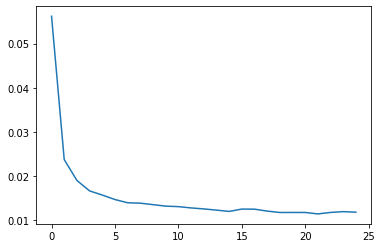

In [ ]:
plt.plot(cutmix_df['train_loss'])
plt.show()

## Train cutmix w/ pretrained on this data

In [ ]:
train_model(psp_net, dataloaders_dict, criterion, scheduler, optimizer, num_epochs=num_epochs)

-------------
Epoch 1/30
-------------
（train）


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


iteration 10 || Loss: 0.1253 || 10iter: 29.3803 sec.
iteration 20 || Loss: 0.0911 || 10iter: 20.2220 sec.
iteration 30 || Loss: 0.0667 || 10iter: 20.6311 sec.
iteration 40 || Loss: 0.0476 || 10iter: 18.5696 sec.
iteration 50 || Loss: 0.0497 || 10iter: 16.9006 sec.
iteration 60 || Loss: 0.0550 || 10iter: 14.6099 sec.
iteration 70 || Loss: 0.0395 || 10iter: 16.3276 sec.
iteration 80 || Loss: 0.0416 || 10iter: 12.9639 sec.
iteration 90 || Loss: 0.0298 || 10iter: 12.3677 sec.
iteration 100 || Loss: 0.0200 || 10iter: 14.5259 sec.
-------------
epoch 1 || Epoch_TRAIN_Loss:0.0749 ||Epoch_VAL_Loss:0.0000
timer:  186.4318 sec.
-------------
Epoch 2/30
-------------
（train）
iteration 110 || Loss: 0.0217 || 10iter: 11.3691 sec.
iteration 120 || Loss: 0.0304 || 10iter: 11.2956 sec.
iteration 130 || Loss: 0.0206 || 10iter: 11.2748 sec.
iteration 140 || Loss: 0.0290 || 10iter: 11.3138 sec.
iteration 150 || Loss: 0.0224 || 10iter: 11.2759 sec.
iteration 160 || Loss: 0.0235 || 10iter: 11.2909 sec.
ite

In [ ]:
pd.read_csv('log_output30.csv').tail)

,Unnamed: 0,epoch,train_loss,val_loss
0,0,1,0.074950,0.00000
1,1,2,0.026534,0.00000
2,2,3,0.020489,0.00000
3,3,4,0.018123,0.00000
4,4,5,0.016350,0.01719


In [ ]:
!cp /content/weights/pspnet50_10.pth /content/drive/MyDrive/2022/LungSegmentation/PSPNet/

In [ ]:
!cp /content/log_output30.csv /content/drive/MyDrive/2022/LungSegmentation/PSPNet/

# Inference

In [ ]:
psp_net.load_state_dict(torch.load('/content/drive/MyDrive/2022/LungSegmentation/PSPNet/again_aug_pspnet50_50.pth',map_location = {'cuda:0':'cpu'}))

<All keys matched successfully>

In [ ]:
val_img_list,val_anno_list = test_img_list,test_anno_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


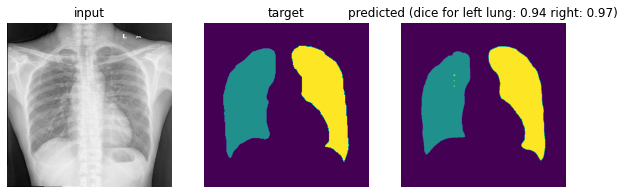

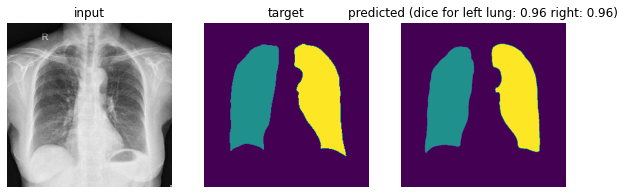

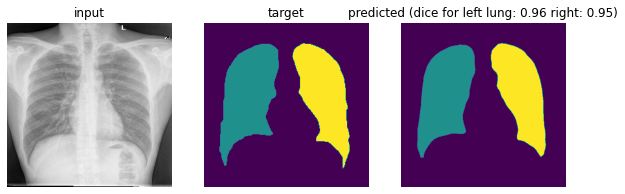

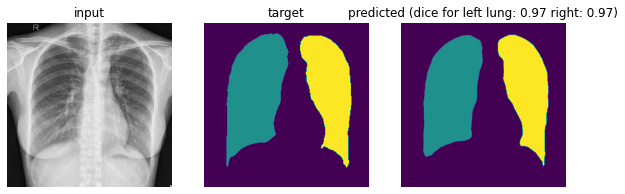

In [ ]:
img_index = 4
for i in range(img_index):
  img_index = i
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 5))
  image_file_path = val_img_list[img_index]
  img_original = Image.open(image_file_path)
  img_width, img_height = img_original.size
  ax1.set_title("input")
  ax1.imshow(img_original)
  ax1.axis('off')

  anno_file_path = val_anno_list[img_index]
  anno_class_img = Image.open(anno_file_path)
  p_palette = anno_class_img.getpalette()
  ax2.set_title("target")
  ax2.imshow(anno_class_img)
  ax2.axis('off')

  psp_net.cuda()
  psp_net.eval()

  img, anno_class_img = val_dataset.__getitem__(img_index)
  x = img.unsqueeze(0).cuda()
  outputs = psp_net(x)
  y = outputs[0]

  y = y[0].cpu().detach().numpy()
  y = np.argmax(y, axis=0)
  anno_predicted = Image.fromarray(np.uint8(y), mode="P")
  #anno_predicted = anno_predicted.resize((img_width, img_height), Image.NEAREST)
  #print(np.array(anno_class_img).shape,np.array(anno_predicted).shape)
  #break

  left_anno_class_img = np.array(anno_class_img)
  left_anno_class_img[left_anno_class_img == 2] = 0
  left_anno_predicted = np.array(anno_predicted)
  left_anno_predicted[left_anno_predicted == 2] = 0

  right_anno_class_img = np.array(anno_class_img)
  right_anno_class_img[right_anno_class_img == 1] = 0
  right_anno_predicted = np.array(anno_predicted)
  right_anno_predicted[right_anno_predicted == 1] = 0

  left_dice = dice_coef(left_anno_class_img, left_anno_predicted)
  right_dice = dice_coef(right_anno_class_img, right_anno_predicted)
  ax3.set_title(f"predicted (dice for left lung: {str(left_dice)[:4]} right: {str(right_dice)[:4]})")
  ax3.imshow(np.array(anno_predicted))
  ax3.axis('off')


  #ax3.show()

# Results

In [ ]:
left_lung_dice = 0.0
right_lung_dice = 0.0

for i in range(len(val_dataset)):
  img_index = i
  img, anno_class_img = val_dataset.__getitem__(img_index)
  x = img.unsqueeze(0).cuda()
  outputs = psp_net(x)
  y = outputs[0]

  y = y[0].cpu().detach().numpy()
  y = np.argmax(y, axis=0)
  anno_predicted = Image.fromarray(np.uint8(y), mode="P")

  left_anno_class_img = np.array(anno_class_img)
  left_anno_class_img[left_anno_class_img == 2] = 0
  left_anno_predicted = np.array(anno_predicted)
  left_anno_predicted[left_anno_predicted == 2] = 0

  right_anno_class_img = np.array(anno_class_img)
  right_anno_class_img[right_anno_class_img == 1] = 0
  right_anno_predicted = np.array(anno_predicted)
  right_anno_predicted[right_anno_predicted == 1] = 0

  left_dice = dice_coef(left_anno_class_img, left_anno_predicted)
  right_dice = dice_coef(right_anno_class_img, right_anno_predicted)
  left_lung_dice += left_dice
  right_lung_dice += right_dice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
left = left_lung_dice/len(val_dataset)
right = right_lung_dice/len(val_dataset)
print(f"dice coefficient for PSPNet: left lung {left_lung_dice/len(val_dataset)} right lung: {right_lung_dice/len(val_dataset)} mean dice: {0.5*(left+right)}")

dice coefficient for PSPNet: left lung 0.9538515486106128 right lung: 0.931253878578914 mean dice: 0.9425527135947633


# Train again

In [ ]:
optimizer = optim.SGD([
    {'params':psp_net.feature_conv.parameters(),'lr':1e-3},
    {'params':psp_net.feature_res_1.parameters(),'lr':1e-3},
    {'params':psp_net.feature_res_2.parameters(),'lr':1e-3},
    {'params':psp_net.feature_dilated_res_1.parameters(),'lr':1e-3},
    {'params':psp_net.feature_dilated_res_2.parameters(),'lr':1e-3},
    {'params':psp_net.pyramid_pooling.parameters(),'lr':1e-3},
    {'params':psp_net.decode_feature.parameters(),'lr':1e-2},
    {'params':psp_net.aux.parameters(),'lr':1e-2},
], momentum = 0.9, weight_decay = 0.0001)

In [ ]:
def lambda_epoch(epoch):
  max_epoch = 50
  return math.pow((1-epoch/max_epoch),0.9)

In [ ]:
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda_epoch)

In [ ]:
train_model(psp_net, dataloaders_dict, criterion, scheduler, optimizer, num_epochs=50)

-------------
Epoch 1/50
-------------
（train）


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


iteration 10 || Loss: 0.0116 || 10iter: 11.4335 sec.
iteration 20 || Loss: 0.0106 || 10iter: 11.3558 sec.
iteration 30 || Loss: 0.0115 || 10iter: 11.4399 sec.
iteration 40 || Loss: 0.0146 || 10iter: 11.8902 sec.
iteration 50 || Loss: 0.0074 || 10iter: 11.5610 sec.
iteration 60 || Loss: 0.0118 || 10iter: 11.3921 sec.
iteration 70 || Loss: 0.0086 || 10iter: 11.3945 sec.
iteration 80 || Loss: 0.0084 || 10iter: 11.6236 sec.
iteration 90 || Loss: 0.0084 || 10iter: 11.3290 sec.
iteration 100 || Loss: 0.0066 || 10iter: 11.3182 sec.
-------------
epoch 1 || Epoch_TRAIN_Loss:0.0102 ||Epoch_VAL_Loss:0.0000
timer:  124.8537 sec.
-------------
Epoch 2/50
-------------
（train）
iteration 110 || Loss: 0.0108 || 10iter: 11.5862 sec.
iteration 120 || Loss: 0.0117 || 10iter: 11.5347 sec.
iteration 130 || Loss: 0.0122 || 10iter: 11.5861 sec.
iteration 140 || Loss: 0.0073 || 10iter: 11.4497 sec.
iteration 150 || Loss: 0.0109 || 10iter: 11.6573 sec.
iteration 160 || Loss: 0.0116 || 10iter: 11.5937 sec.
ite

In [ ]:
left_lung_dice = 0.0
right_lung_dice = 0.0

for i in range(len(val_dataset)):
  img_index = i
  img, anno_class_img = val_dataset.__getitem__(img_index)
  x = img.unsqueeze(0).cuda()
  outputs = psp_net(x)
  y = outputs[0]

  y = y[0].cpu().detach().numpy()
  y = np.argmax(y, axis=0)
  anno_predicted = Image.fromarray(np.uint8(y), mode="P")

  left_anno_class_img = np.array(anno_class_img)
  left_anno_class_img[left_anno_class_img == 2] = 0
  left_anno_predicted = np.array(anno_predicted)
  left_anno_predicted[left_anno_predicted == 2] = 0

  right_anno_class_img = np.array(anno_class_img)
  right_anno_class_img[right_anno_class_img == 1] = 0
  right_anno_predicted = np.array(anno_predicted)
  right_anno_predicted[right_anno_predicted == 1] = 0

  left_dice = dice_coef(left_anno_class_img, left_anno_predicted)
  right_dice = dice_coef(right_anno_class_img, right_anno_predicted)
  left_lung_dice += left_dice
  right_lung_dice += right_dice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
left = left_lung_dice/len(val_dataset)
right = right_lung_dice/len(val_dataset)
print(f"dice coefficient for PSPNet: left lung {left_lung_dice/len(val_dataset)} right lung: {right_lung_dice/len(val_dataset)} mean dice: {0.5*(left+right)}")

dice coefficient for PSPNet: left lung 0.9538515486106128 right lung: 0.931253878578914 mean dice: 0.9425527135947633


# Comparisons

freeze로 새로 추가한 모델을 학습시키고
나중에 unfreeze해서 finetuning하는 방식이에요